In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm,skew

In [2]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train_id=train.PassengerId
test_id=test.PassengerId

In [6]:
train.drop(["PassengerId"],axis=1,inplace=True)
test.drop(["PassengerId"],axis=1,inplace=True)

# Data Processing

## Outliers

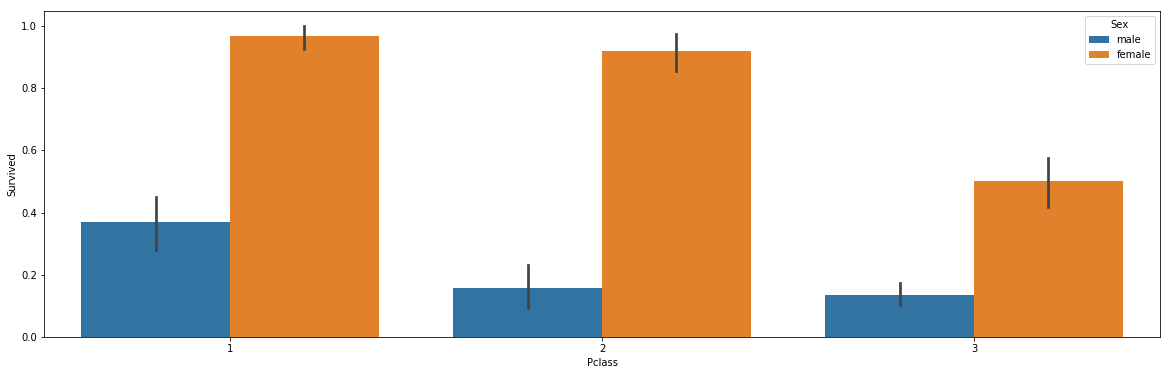

In [7]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
sns.barplot(y=train.Survived,x=train.Pclass,hue=train.Sex)

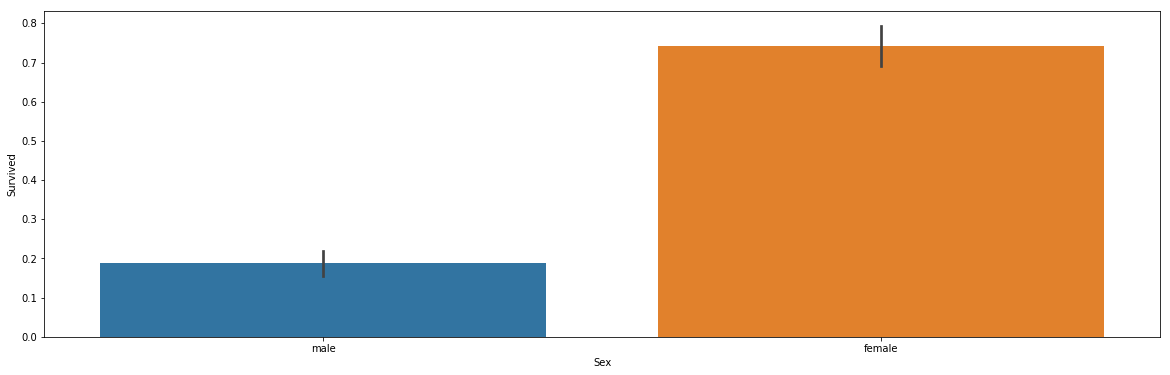

In [8]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
sns.barplot(y=train.Survived,x=train.Sex)

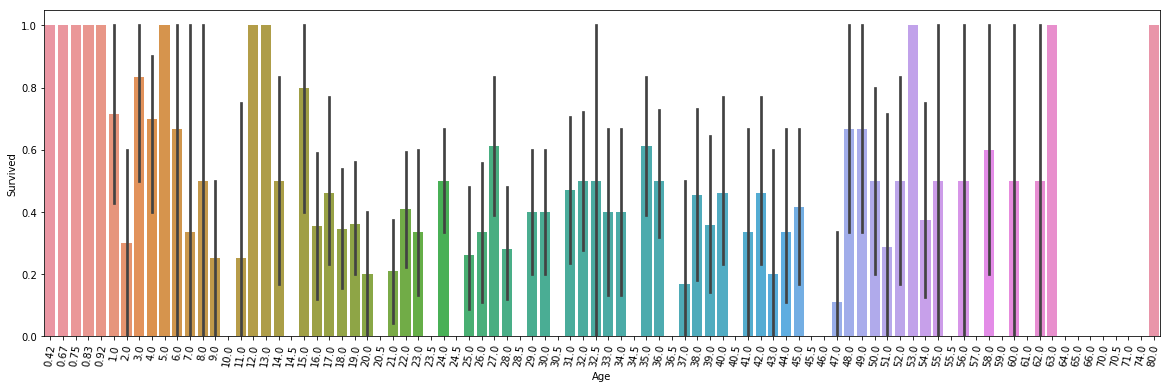

In [9]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.barplot(y=train.Survived,x=train.Age)

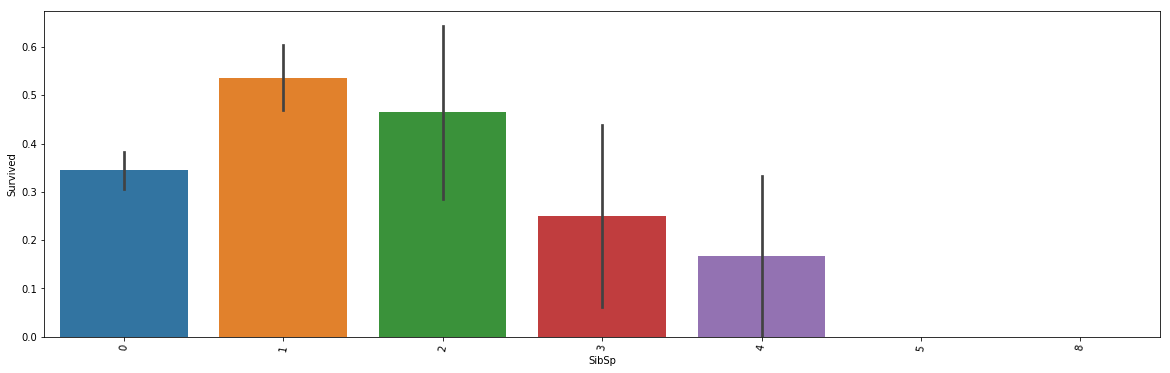

In [10]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.barplot(y=train.Survived,x=train.SibSp)

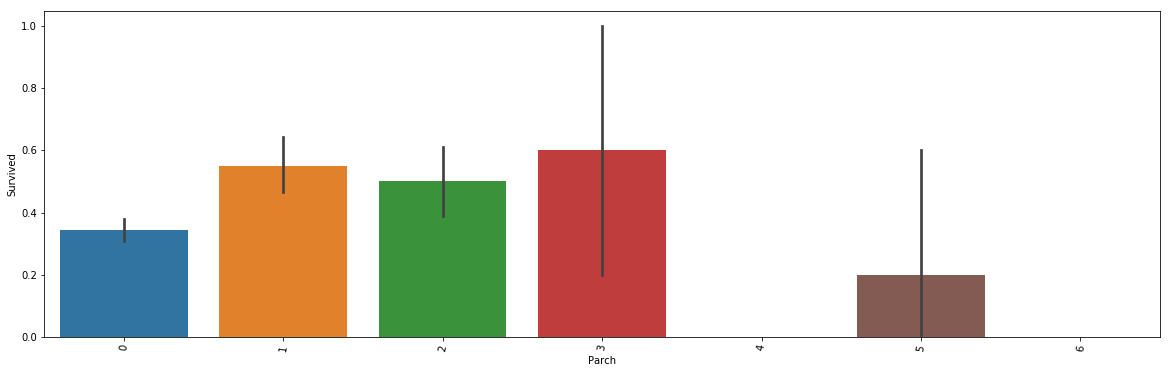

In [11]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.barplot(y=train.Survived,x=train.Parch)

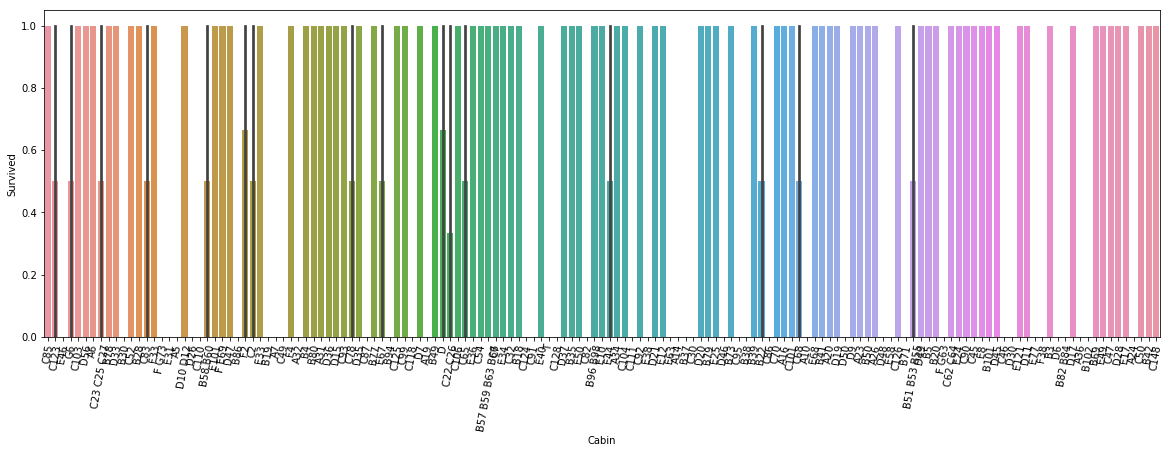

In [12]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.barplot(y=train.Survived,x=train.Cabin)

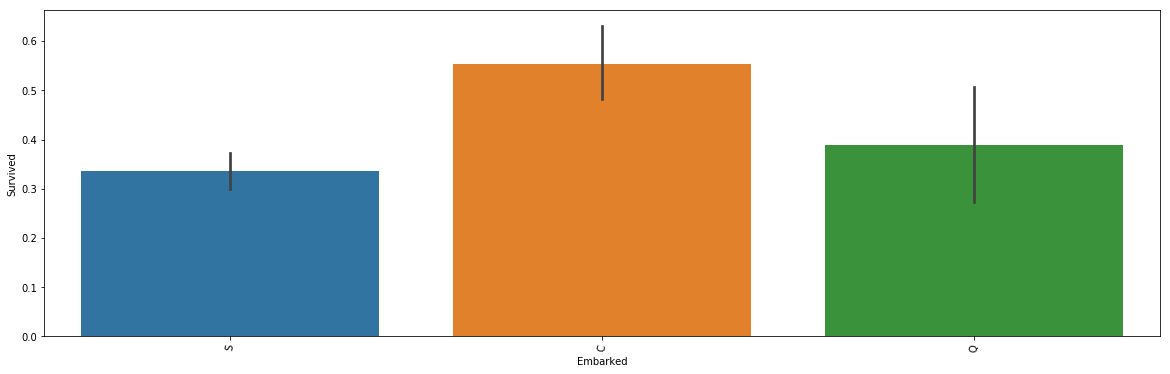

In [13]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.barplot(y=train.Survived,x=train.Embarked)

32.204207968574636 49.6655344447741


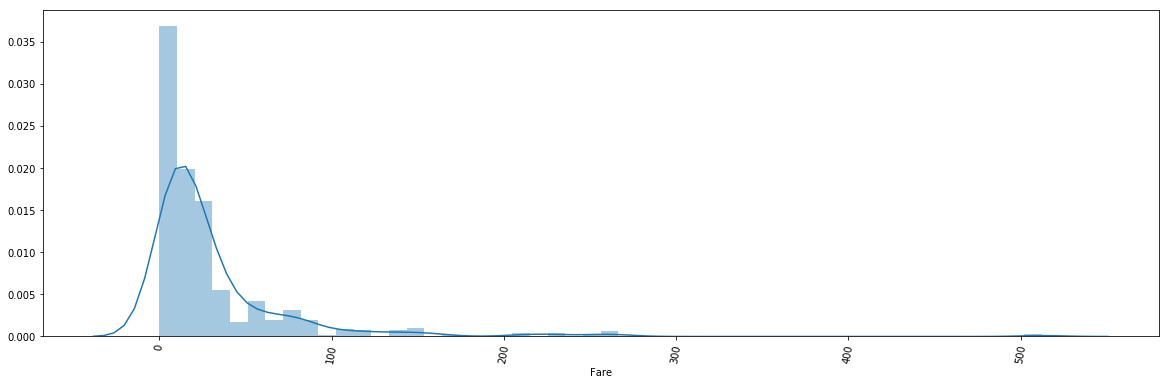

In [14]:
fig,ax=plt.subplots(1,1,figsize=(20,6))
plt.xticks(rotation=80)
sns.distplot(train.Fare)
mu,sigma=norm.fit(train.Fare)
print(mu,sigma)

# Feature Engineering

In [15]:
ntrain=train.shape[0]
ntest=train.shape[0]
y_train=train.Survived.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop("Survived",axis=1,inplace=True)

c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [16]:
all_data.shape

(1309, 10)

# Missing Data

In [17]:
all_data_na=all_data.isnull().sum()/len(all_data)*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index)
missing_data=pd.DataFrame({"missing_ratio":all_data_na})
missing_data.head()

,missing_ratio
Age,20.091673
Cabin,77.463713
Embarked,0.152788
Fare,0.076394


In [18]:
missing_data

,missing_ratio
Age,20.091673
Cabin,77.463713
Embarked,0.152788
Fare,0.076394


In [19]:
all_data.Age.fillna(all_data.Age.mean(),inplace=True)

In [20]:
all_data.drop(["Cabin"],axis=1,inplace=True)

In [21]:
all_data.Embarked.fillna("C",inplace=True)

In [22]:
all_data.Fare.fillna(all_data.Fare.mean(),inplace=True)

# More features engeneering

In [23]:
all_data.drop("Name",axis=1, inplace=True)

In [24]:
all_data.drop("Ticket",axis=1, inplace=True)

In [25]:
all_data.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp'], dtype='object')

In [26]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [27]:
categorical_cols=['Age','Parch', 'Pclass', 'SibSp']
for col in categorical_cols:
    all_data[col]=all_data[col].astype(str)

In [28]:
from sklearn.preprocessing import LabelEncoder
cols_le=['Age', 'Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
for col in cols_le:
    lbl=LabelEncoder()
    lbl.fit(list(all_data[col].values))
    all_data[col]=lbl.transform(list(all_data[col].values))

In [29]:
all_data.shape

(1309, 7)

###  skewed features


In [30]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Fare,4.364366
Parch,3.137416
SibSp,3.036214
Age,0.767486
Pclass,-0.597961
Sex,-0.601499
Embarked,-1.117525


In [31]:
from scipy.special import boxcox1p
skewed_features = ["Fare"]
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

### dummy

In [32]:
all_data=pd.get_dummies(all_data)
print(all_data.shape)


(1309, 7)


In [36]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Age         1309 non-null int64
Embarked    1309 non-null int64
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(1), int64(6)
memory usage: 71.7 KB


# Modelling

In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

c:\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [37]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [38]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3881 (0.0147)



In [39]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3881 (0.0147)



In [40]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3776 (0.0243)



In [41]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3913 (0.0252)



In [42]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3689 (0.0237)



In [43]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3863 (0.0157)



## Stacking Model

In [44]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [45]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.3702 (0.0200)



# Meta Model

In [46]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [47]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.3712 (0.0177)


In [48]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [49]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = (stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.306285146446927


In [50]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = (model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.2531988905013731


In [51]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = (model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.35137569119041073


In [52]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.30004559298730205


In [53]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [54]:
sub = pd.DataFrame()
sub['PassengerId'] = test_id
sub['Survived'] = ensemble

from datetime import datetime
now=datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_ensemble_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)